In [177]:
#ABC Company Employee Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = pd.read_excel('myexcel.xlsx')

In [4]:
file.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [9]:
file["new_Height"] = np.random.randint(150, 181,size=len(file))

In [10]:
file.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,new_Height
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,175
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,159
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN,168
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,151
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0,156


In [22]:
file["New_Salary"] = file["Salary"].fillna(file["Salary"].median())
file["New_College"] = file["College"].fillna("Unknown")


In [23]:
file

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,new_Height,New_College,New_Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,175,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,159,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,2836186.0,168,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,151,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,Unknown,5000000.0,156,Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0,172,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,Unknown,900000.0,162,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,Unknown,2900000.0,169,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0,152,Kansas,947276.0


In [24]:
# 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. 

In [171]:
df_team_distribution = file.groupby("Team").size()
df_team_percentage = (df_team_distribution / len(file)) * 100
team_distribution_df = pd.DataFrame({"Team": df_team_percentage.index, "Percentage": df_team_percentage.values})

In [59]:
df_team_percentage

Team
Atlanta Hawks             3.275109
Boston Celtics            3.275109
Brooklyn Nets             3.275109
Charlotte Hornets         3.275109
Chicago Bulls             3.275109
Cleveland Cavaliers       3.275109
Dallas Mavericks          3.275109
Denver Nuggets            3.275109
Detroit Pistons           3.275109
Golden State Warriors     3.275109
Houston Rockets           3.275109
Indiana Pacers            3.275109
Los Angeles Clippers      3.275109
Los Angeles Lakers        3.275109
Memphis Grizzlies         3.930131
Miami Heat                3.275109
Milwaukee Bucks           3.493450
Minnesota Timberwolves    3.056769
New Orleans Pelicans      4.148472
New York Knicks           3.493450
Oklahoma City Thunder     3.275109
Orlando Magic             3.056769
Philadelphia 76ers        3.275109
Phoenix Suns              3.275109
Portland Trail Blazers    3.275109
Sacramento Kings          3.275109
San Antonio Spurs         3.275109
Toronto Raptors           3.275109
Utah Jazz      

Text(0.5, 1.0, 'Distribution of employees across teams')

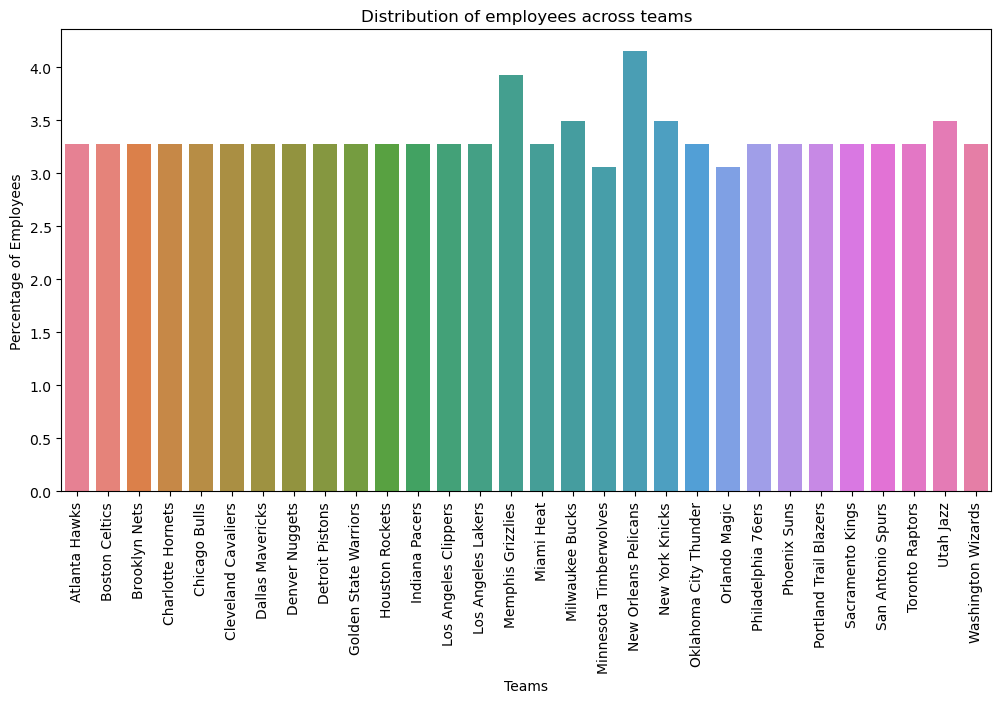

In [163]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_distribution_df["Team"],y=team_distribution_df["Percentage"],hue=team_distribution_df["Team"])
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Percentage of Employees")
plt.title("Distribution of employees across teams")


In [170]:
team_with_highest_percentage = team_distribution_df.loc[team_distribution_df["Percentage"].idxmax()]
print(f"The team with the highest percentage is {team_with_highest_percentage['Team']} with {team_with_highest_percentage['Percentage']}% employees.")


The team with the highest percentage is New Orleans Pelicans with 4.148471615720524% employees.


In [93]:
#2. Segregate employees based on their positions within the company. 

In [94]:
position_distribution=file["Position"].value_counts()
position_distribution

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Employees by Position')

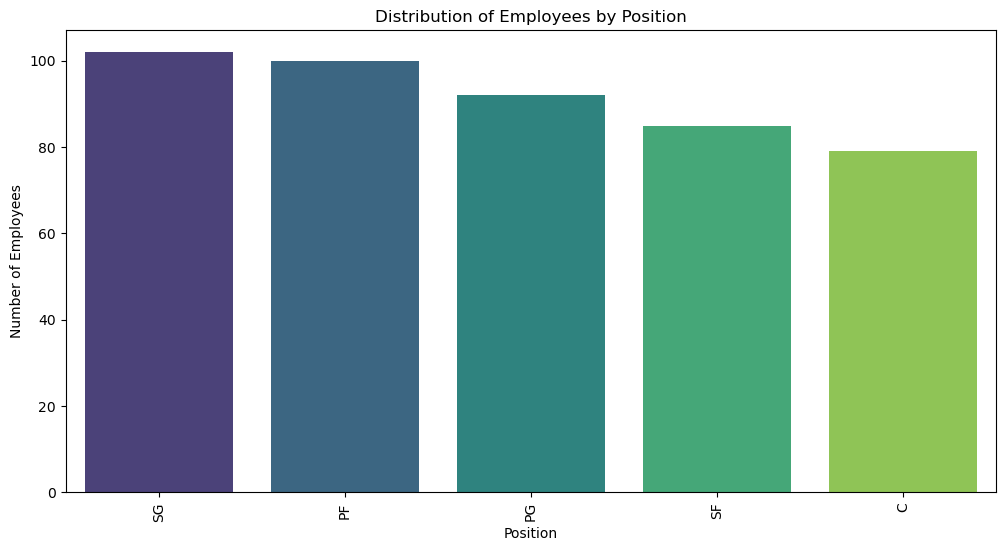

In [178]:
plt.figure(figsize=(12,6))
sns.barplot(x=position_distribution.index,y=position_distribution.values,hue=position_distribution.index,palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees by Position")

In [96]:
#3. Identify the predominant age group among employees.

Text(0.5, 1.0, 'Age distribution of employees')

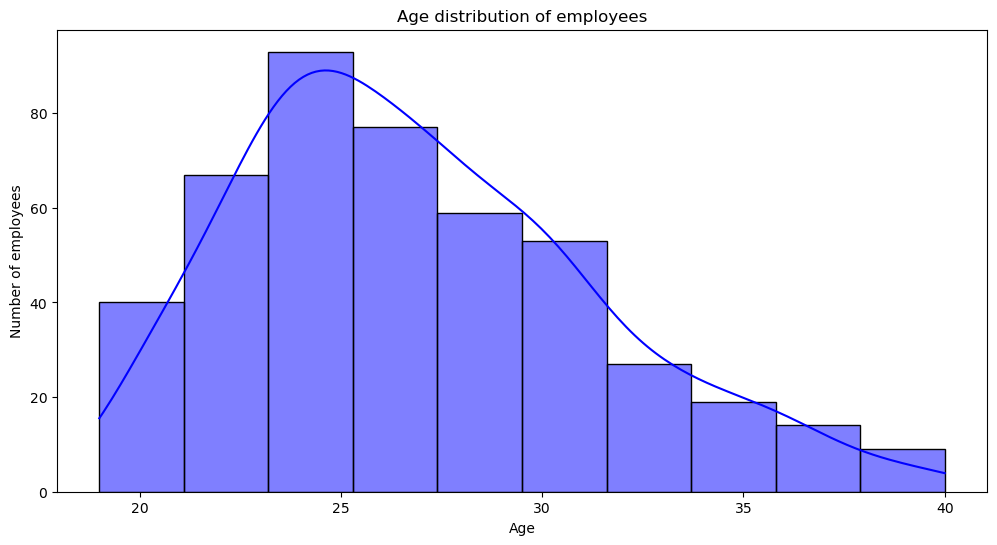

In [108]:
plt.figure(figsize=(12,6))
sns.histplot(file["Age"],bins=10,kde=True,color="blue")
plt.xlabel("Age")
plt.ylabel("Number of employees")
plt.title("Age distribution of employees")

In [172]:
age_groups = pd.cut(file["Age"], bins=10)  # Categorize ages into 10 bins
position_age_group_distribution = pd.crosstab(file["Position"], age_groups)
most_common_age_group = position_age_group_distribution.idxmax(axis=1)
print("Most common age group for each position:")
print(most_common_age_group)

Most common age group for each position:
Position
C     (25.3, 27.4]
PF    (23.2, 25.3]
PG    (23.2, 25.3]
SF    (21.1, 23.2]
SG    (23.2, 25.3]
dtype: category
Categories (10, interval[float64, right]): [(18.979, 21.1] < (21.1, 23.2] < (23.2, 25.3] < (25.3, 27.4] ... (31.6, 33.7] < (33.7, 35.8] < (35.8, 37.9] < (37.9, 40.0]]


In [109]:
#4. Discover which team and position have the highest salary expenditure.

In [147]:
team_salary_expense = file.groupby("Team")["New_Salary"].sum().sort_values(ascending=False)
position_salary_expense = file.groupby("Position")["New_Salary"].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Total Salary Expenditure by Team')

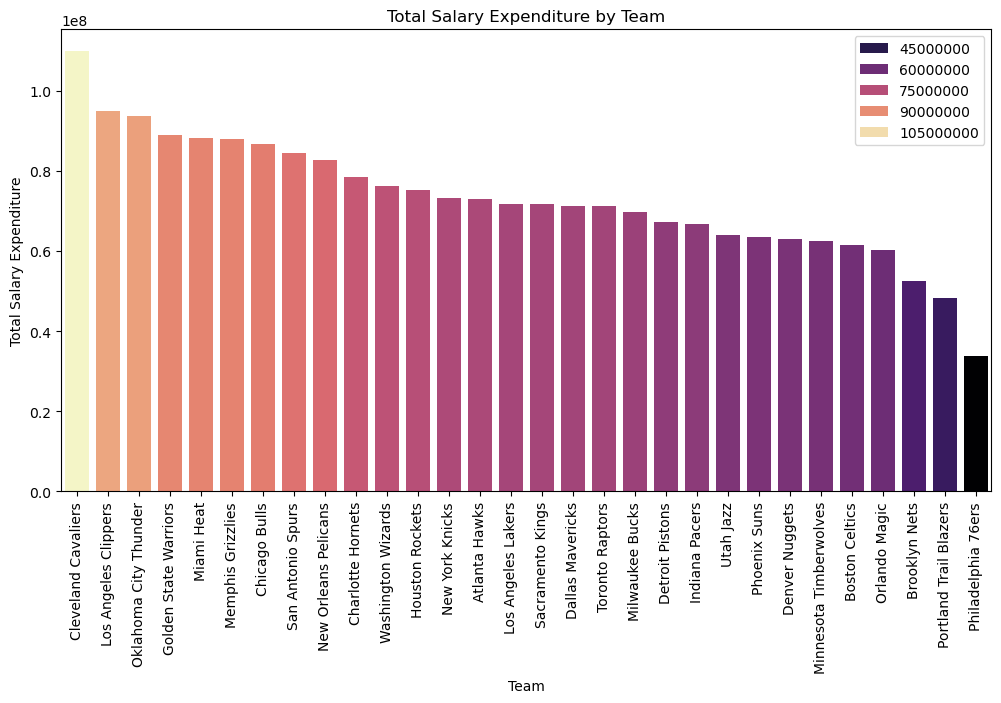

In [148]:
plt.figure(figsize=(12, 6))
sns.barplot(x=team_salary_expense.index, y=team_salary_expense.values,hue=team_salary_expense.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Team")

In [174]:
team_with_highest_expense = team_salary_expense.idxmax()
position_with_highest_expense = position_salary_expense.idxmax()

print(f"The team with the highest salary expenditure is: {team_with_highest_expense}")
print(f"The position with the highest salary expenditure is: {position_with_highest_expense}")

The team with the highest salary expenditure is: Cleveland Cavaliers
The position with the highest salary expenditure is: C


In [173]:
#5. Investigate if there's any correlation between age and salary, and represent it visually. 


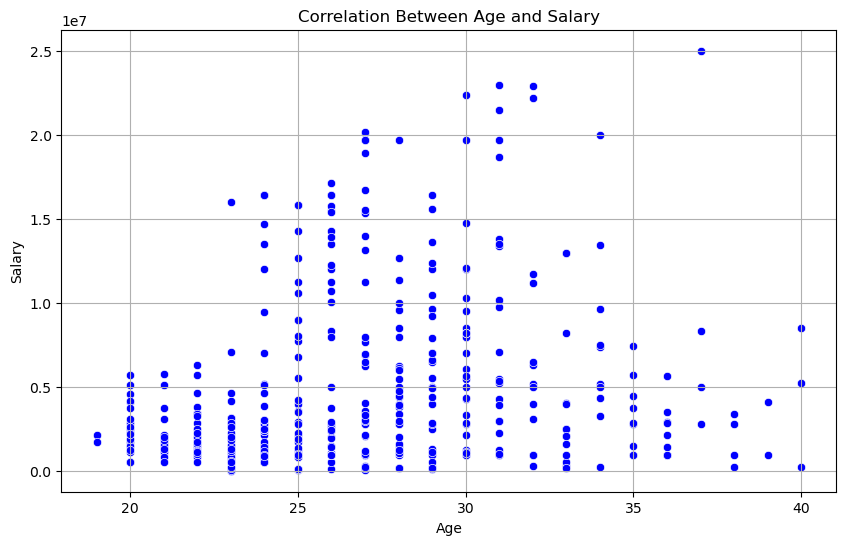

In [153]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=file["Age"],y=file["New_Salary"],color="blue")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.grid()